# Problem Statement

__Aerofit sells three different kind of treadmills.The company would like to improve their business by giving the appropriate recommendation to the new users.For this, we need to investigate if a certain customer feautre has any impact on the product they are buying.This requires analysing the data available and drawing insights from the data.__

## Preread

I have mentioned all the insights and comments under the respective visualizations or tables.
Recommendations have been mentioned at the last.

In [1]:
#importing all the important libraries required for data analysis
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading a csv file into dataframe
aerofit_df = pd.read_csv('aerofit_treadmill.csv')
#looking at the starting 10 rows of the data for an overview
aerofit_df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [3]:
#shape returns tuple containing shape of dataframe row,columns
aerofit_df.shape

(180, 9)

## Shape of data

__We see that there are 9 columns and 180 rows.__

In [4]:
#To see the information about the datafram
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


__We see that there are no missing values and the types are object and int64__

In [5]:
#To see the number of records for each product
aerofit_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

__We see that there are 80 KP281, 60 KP481 nad 40 KP781 products. The data available has more KP281 products.__

In [6]:
#To see the number of records for each gender
aerofit_df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

__In the given data we have 104 males and 76 females.__

In [7]:
#To see the range of the ages in this dataset
age_range=aerofit_df['Age'].unique()
age_range

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

__We have age groups ranging from 18 to 50.__

In [8]:
aerofit_df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

__In the prior three months we see that married people purchased treadmills more than singles.__

In [9]:
aerofit_df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

__We can see that the customers with fitness level 3 bought more treadmills__

## Univariate plots & Bivariate plots

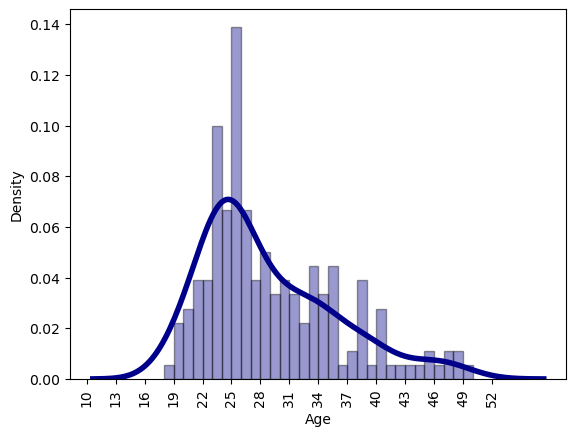

In [10]:
#Plotting the distribution of age using histogram and kde plot
sb.distplot(aerofit_df['Age'],hist=True,kde=True,bins=int(32),color='darkblue',hist_kws={'edgecolor':'black'},#customizing histplot
kde_kws={'linewidth': 4})
#Rotating the x axis labels
plt.xticks(np.arange(10,55,3),rotation='vertical')
plt.show()

__Converting the age into categorical data to get better insights__

In [11]:
#Converting the age into a categorical variable by dividing into bins,this way we can study the different age groups
age_labels=['17-23','23-28','28-33','33-38','38-43','43-48','>=48']
aerofit_df['age_group']=pd.cut(aerofit_df['Age'],bins=np.arange(17,57,5),labels=age_labels)
aerofit_df['age_group'].value_counts()

23-28    74
28-33    32
33-38    25
17-23    24
38-43    15
43-48     7
>=48      3
Name: age_group, dtype: int64

In [12]:
#checking for null values if any
aerofit_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
age_group        0
dtype: int64

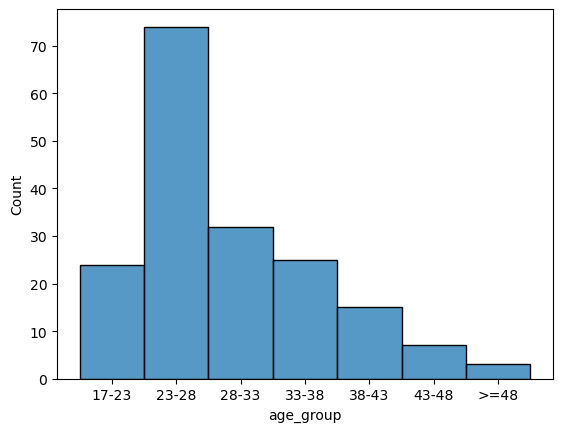

In [13]:
sb.histplot(aerofit_df['age_group'])
plt.show()

__We can see that customers between age 23-28 have bought the treadmills more__

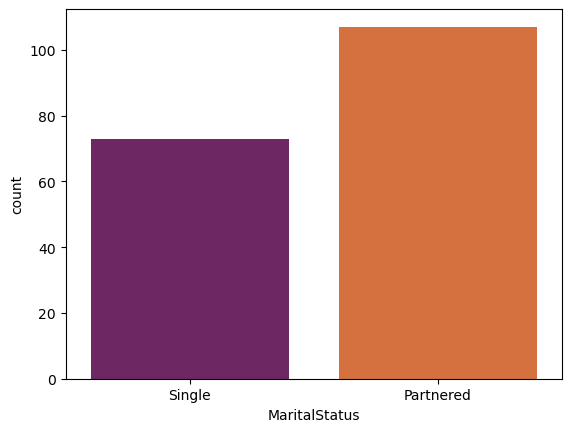

In [14]:
sb.countplot(aerofit_df['MaritalStatus'],palette='inferno')
plt.show()

__We can see that married people bought the treadmills more in prior 3 months__

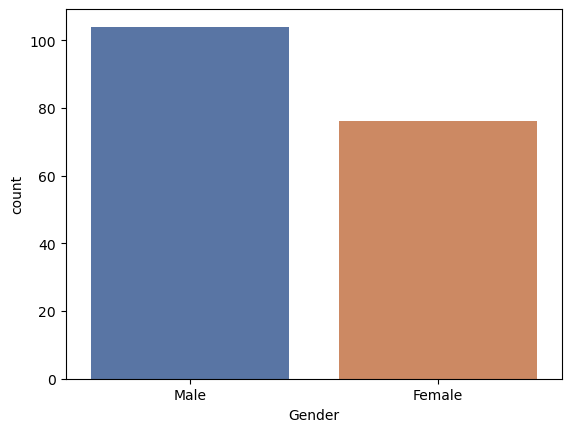

In [15]:
sb.countplot(aerofit_df['Gender'],palette='deep')
plt.show()

__We can see that males bought the treadmills more__

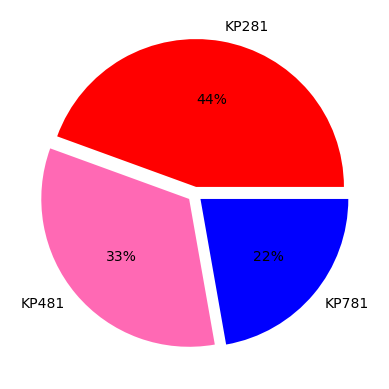

In [16]:
product_labels=['KP281','KP481','KP781']
product_df=pd.DataFrame(aerofit_df['Product'].value_counts())
plt.pie(product_df['Product'],labels=product_labels,explode=(0.05,0.05,0.05),colors=["red", "hotpink", "b"],autopct="%.0f%%")
plt.show()

__We can see that KP281 products have been sold more maybe because they are less expensive__

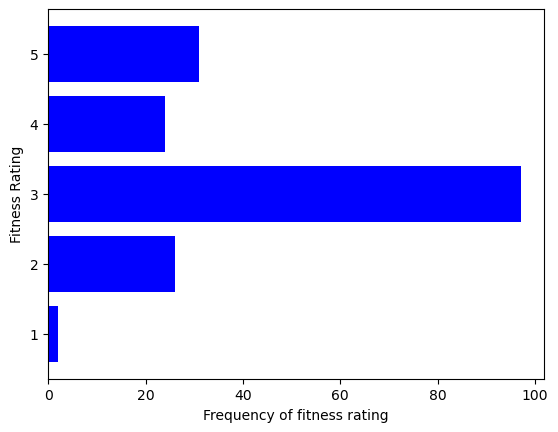

In [17]:
df_fitness = pd.DataFrame(aerofit_df['Fitness'].value_counts())
df_fitness.reset_index(inplace=True)
df_fitness.rename(columns={'index':'Fitnessrating','Fitness':'Count'},inplace=True)
plt.barh(df_fitness[::-1]['Fitnessrating'],df_fitness[::-1]['Count'],color=['blue'])
plt.xlabel('Frequency of fitness rating')
plt.ylabel('Fitness Rating')
plt.show()

__The customers with fitness rating 3 have bought more treadmills__

In [18]:
aerofit_df['Income'].sort_values()

0       29562
2       30699
1       31836
80      31836
3       32973
        ...  
171     95866
169     99601
168    103336
178    104581
174    104581
Name: Income, Length: 180, dtype: int64

In [19]:
#converting the income column to a categorical column by dividing into bins, to study income as a group
income_labels=['20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-160k','>160k']
aerofit_df['Incomecategory'] = pd.cut(aerofit_df['Income'],bins=np.arange(20000,200000,20000),labels=income_labels)
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Incomecategory
0,KP281,18,Male,14,Single,3,4,29562,112,17-23,20k-40k
1,KP281,19,Male,15,Single,2,3,31836,75,17-23,20k-40k
2,KP281,19,Female,14,Partnered,4,3,30699,66,17-23,20k-40k
3,KP281,19,Male,12,Single,3,3,32973,85,17-23,20k-40k
4,KP281,20,Male,13,Partnered,4,2,35247,47,17-23,20k-40k
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,38-43,80k-100k
176,KP781,42,Male,18,Single,5,4,89641,200,38-43,80k-100k
177,KP781,45,Male,16,Single,5,5,90886,160,43-48,80k-100k
178,KP781,47,Male,18,Partnered,4,5,104581,120,43-48,100k-120k


In [20]:
aerofit_df['Incomecategory'].value_counts()

40k-60k      106
20k-40k       32
60k-80k       23
80k-100k      16
100k-120k      3
120k-140k      0
140k-160k      0
>160k          0
Name: Incomecategory, dtype: int64

__We can see that the customers who earn between 40k to 60k dollars bought more treadmills__

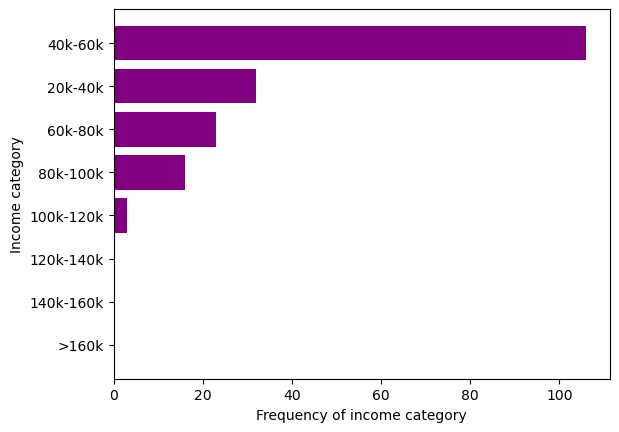

In [21]:
df_incomecategory = pd.DataFrame(aerofit_df['Incomecategory'].value_counts())
df_incomecategory.reset_index(inplace=True)
df_incomecategory.rename(columns={'index':'Incomecategory','Incomecategory':'Count'},inplace=True)
plt.barh(df_incomecategory[::-1]['Incomecategory'],df_incomecategory[::-1]['Count'],color=['purple'])
plt.xlabel('Frequency of income category')
plt.ylabel('Income category')
plt.show()

__There are more customers with the income between 40k-60k who bought treadmills in the last three months.__

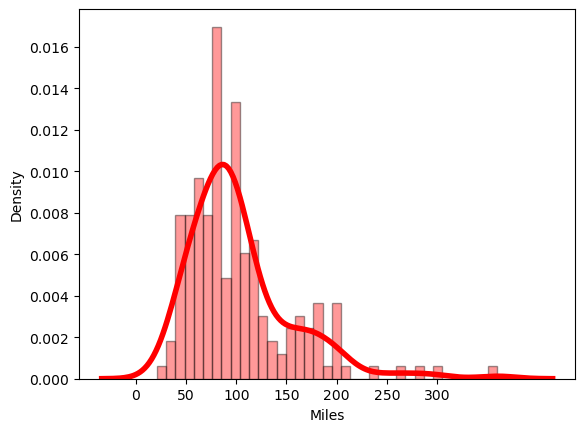

In [22]:
#To visualize the distribution of miles
sb.distplot(aerofit_df['Miles'],hist=True,kde=True,bins=int(37),color='red',hist_kws={'edgecolor':'black'},#customizing histplot
kde_kws={'linewidth': 4})
plt.xticks(np.arange(0,350,50))
plt.show()

In [23]:
aerofit_df['Miles'].value_counts().sort_values(ascending=False)

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
56      6
64      6
180     6
200     6
127     5
160     5
42      4
150     4
120     3
103     3
38      3
170     3
74      3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

__We can see more customers who run/walk 80-90 miles on an average per week bought the treadmills.__

In [24]:
aerofit_df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

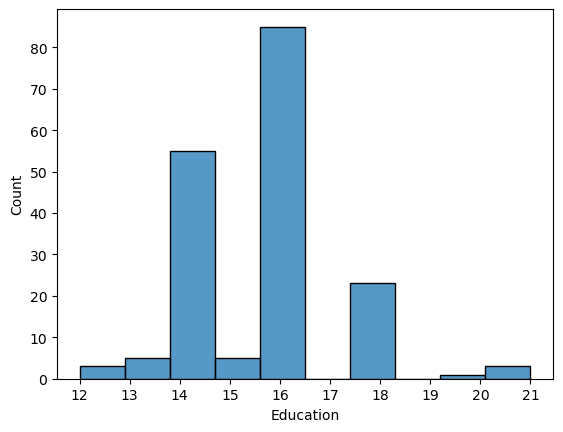

In [25]:
sb.histplot(aerofit_df['Education'],bins=10)
plt.xticks(np.arange(12,22,1))
plt.show()

__There are more customers with education of 16 years__

In [26]:
aerofit_df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

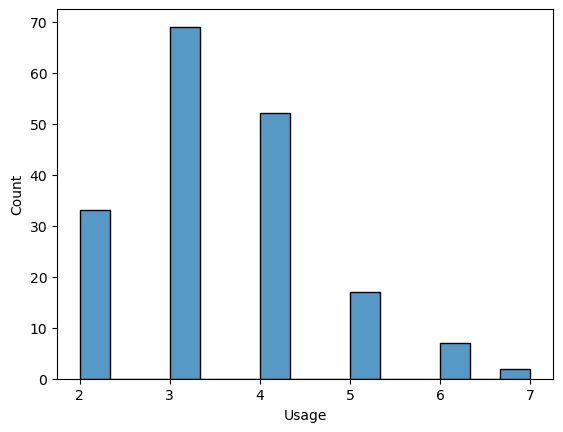

In [27]:
sb.histplot(aerofit_df['Usage'])
plt.show()

__There are more customers who use treadmill 3 times a week on an average__

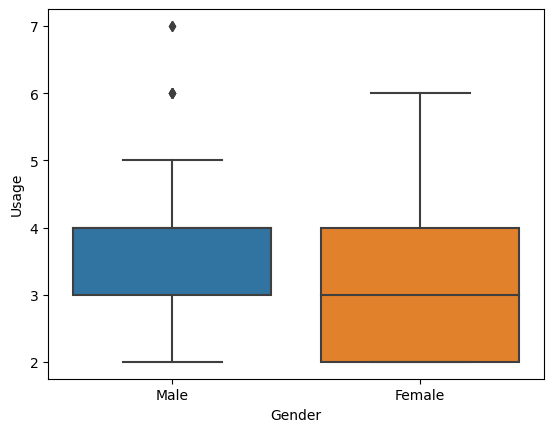

In [28]:
#Plotting a boxplot to check for outliers
sb.boxplot(x='Gender',y='Usage',data=aerofit_df)
plt.show()

In [29]:
aerofit_df.groupby(['Gender'])['Usage'].quantile([0.25,0.5,0.75])

Gender      
Female  0.25    2.0
        0.50    3.0
        0.75    4.0
Male    0.25    3.0
        0.50    4.0
        0.75    4.0
Name: Usage, dtype: float64

### Comparing the two box plots

__For the males, the median is 4 and for females it is 3. This means that 50% of the data is lying below 4 for males and 50% of data is lying below 3 for females.This can be interpreted as 50% of males use treadmill 4 times per week on average.Thus, the usage is more in males.__
__Also, for the category males, the median and 3rd quartile are overlapping. This means most of the data usage is 4 or less than that.The data is mostly near the median.__
__For the female category, the data is more spread.The data is less consistent__

## Outliers

__7 and 6 are outliers in male__

<AxesSubplot:xlabel='age_group', ylabel='Usage'>

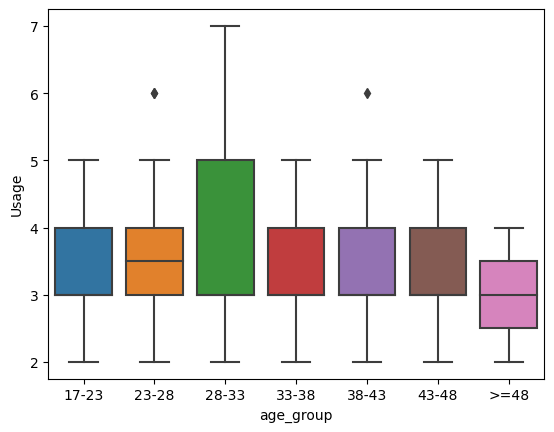

In [30]:
sb.boxplot(x='age_group',y='Usage',data=aerofit_df)

In [31]:
aerofit_df.groupby(['age_group'])['Usage'].quantile([0.25,0.5,0.75])

age_group      
17-23      0.25    3.0
           0.50    3.0
           0.75    4.0
23-28      0.25    3.0
           0.50    3.5
           0.75    4.0
28-33      0.25    3.0
           0.50    3.0
           0.75    5.0
33-38      0.25    3.0
           0.50    3.0
           0.75    4.0
38-43      0.25    3.0
           0.50    3.0
           0.75    4.0
43-48      0.25    3.0
           0.50    3.0
           0.75    4.0
>=48       0.25    2.5
           0.50    3.0
           0.75    3.5
Name: Usage, dtype: float64

__Usage is almost similar for every age group.__

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

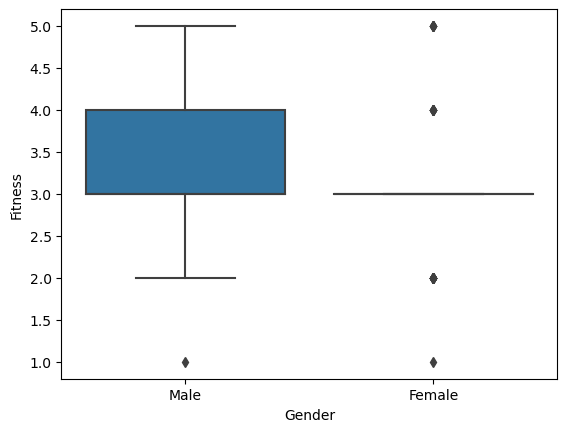

In [32]:
sb.boxplot(x='Gender',y='Fitness',data=aerofit_df)

In [33]:
aerofit_df.groupby(['Gender'])['Fitness'].quantile([0.25,0.5,0.75])

Gender      
Female  0.25    3.0
        0.50    3.0
        0.75    3.0
Male    0.25    3.0
        0.50    3.0
        0.75    4.0
Name: Fitness, dtype: float64

__We can see that in males the fitness rate goes up to 5. Both in male and female the 50% of the data lies below 3. In females, there very few whose rating is 5 or 4 hence they are considered as outliers__

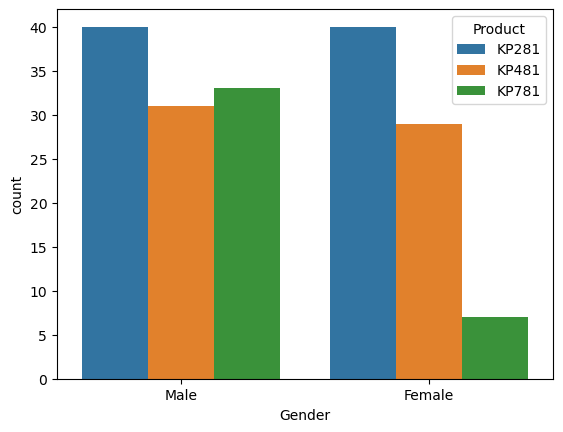

In [34]:
sb.countplot(aerofit_df['Gender'],hue=aerofit_df['Product'])
plt.show()

__There are less female customers who prefer the KP781 product.Both category customers prefer KP281 more__


<AxesSubplot:xlabel='Gender', ylabel='Miles'>

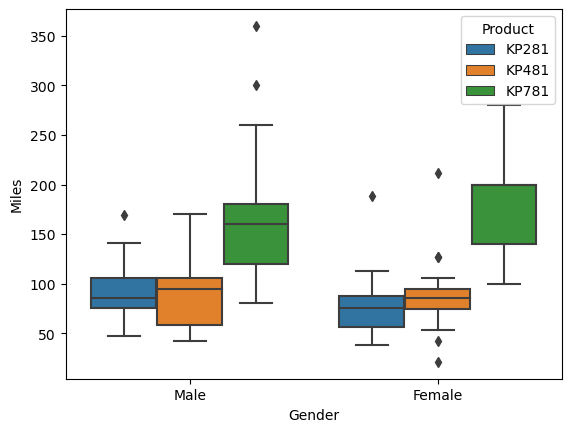

In [35]:
sb.boxplot(x='Gender',y='Miles',data=aerofit_df,hue='Product')

In [36]:
aerofit_df.groupby(['Gender','Product'])['Miles'].quantile([0.25,0.5,0.75])

Gender  Product      
Female  KP281    0.25     56.00
                 0.50     75.00
                 0.75     87.25
        KP481    0.25     74.00
                 0.50     85.00
                 0.75     95.00
        KP781    0.25    140.00
                 0.50    200.00
                 0.75    200.00
Male    KP281    0.25     75.00
                 0.50     85.00
                 0.75    105.25
        KP481    0.25     58.50
                 0.50     95.00
                 0.75    106.00
        KP781    0.25    120.00
                 0.50    160.00
                 0.75    180.00
Name: Miles, dtype: float64

__From the visualization and the data, we can see the below points:__<br>
1.The number of miles the customers expects to run or walk affects the product they are buying.Because from this boxplot we can see that the average miles for each product is inreasing.Example: for KP281 Males average miles is 85,KP481 male average miles is 95, KP781 males average miles is 160.<br>
2.In males the average miles is 180 for the product KP781 and the same is 200 in females for the product 200.This might be because there are very few female customers who bought the KP781.Even if they bought, the average miles is very high around 200.


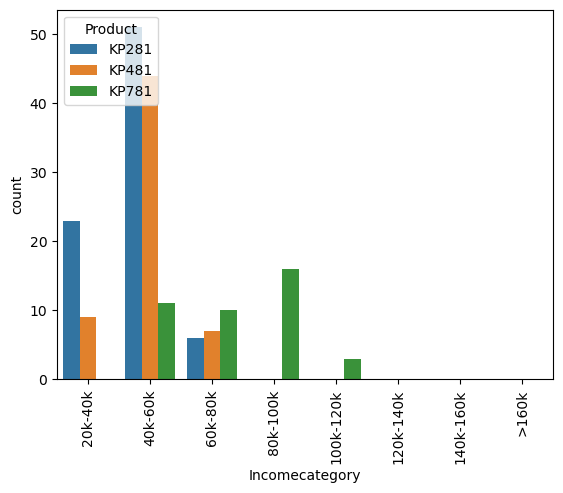

In [37]:
sb.countplot(aerofit_df['Incomecategory'],hue=aerofit_df['Product'])
plt.xticks(rotation=90)
plt.show()

__From the above visualization we can see the below points:__<br>
1.The customer who are earning 20k-60k dollars preferred the KP281 product more. This might be because the product is less expensive.<br>
2.The customers who earn 40k dollars and above also preferred KP481 product.<br>
3.As the income goes above 40k there is a chance that the customer might buy the kp781 product.<br>
4.Customers who earn 60k-80k bought KP781 product.<br>
5.Customer who earn 80k-100k bought and preferred KP781 (expensive product).<br>
Income is one of the major factor that is affecting the choice of prodcut

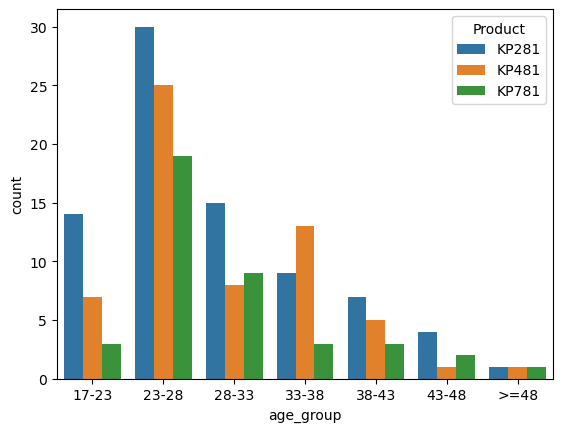

In [38]:
sb.countplot(aerofit_df['age_group'],hue=aerofit_df['Product'])
plt.show()

__From the above visualization we can see the below points:__<br>
1.The customers in the age group 23-28 bought treadmill more than the other groups.<br>
2.Age group 23-28 bought kp781 more compared to the other age groups<br>


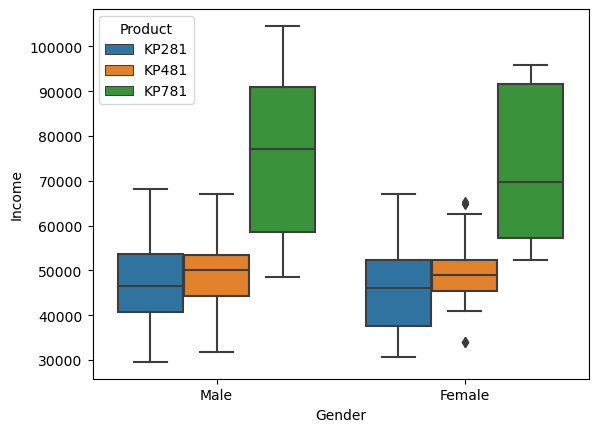

In [39]:
sb.boxplot(x='Gender',y='Income',data=aerofit_df,hue='Product')
plt.show()

In [40]:
aerofit_df.groupby(['Gender','Product'])['Income'].quantile([0.25,0.5,0.75])

Gender  Product      
Female  KP281    0.25    37521.00
                 0.50    46048.50
                 0.75    52302.00
        KP481    0.25    45480.00
                 0.50    48891.00
                 0.75    52302.00
        KP781    0.25    57271.00
                 0.50    69721.00
                 0.75    91508.50
Male    KP281    0.25    40647.75
                 0.50    46617.00
                 0.75    53723.25
        KP481    0.25    44343.00
                 0.50    50028.00
                 0.75    53439.00
        KP781    0.25    58516.00
                 0.50    77191.00
                 0.75    90886.00
Name: Income, dtype: float64

In [41]:
aerofit_df.groupby(['Gender','Product'])['Income'].describe()

count          mean           std      min       25%      50%  \
Gender Product                                                                  
Female KP281     40.0  46020.075000   9226.214704  30699.0  37521.00  46048.5   
       KP481     29.0  49336.448276   7984.486277  34110.0  45480.00  48891.0   
       KP781      7.0  73633.857143  19009.925227  52291.0  57271.00  69721.0   
Male   KP281     40.0  46815.975000   9022.407705  29562.0  40647.75  46617.0   
       KP481     31.0  48634.258065   9356.202876  31836.0  44343.00  50028.0   
       KP781     33.0  75825.030303  18675.002521  48556.0  58516.00  77191.0   

                     75%       max  
Gender Product                      
Female KP281    52302.00   67083.0  
       KP481    52302.00   65220.0  
       KP781    91508.50   95866.0  
Male   KP281    53723.25   68220.0  
       KP481    53439.00   67083.0  
       KP781    90886.00  104581.0

__From the visual and the data we observe the below points:__<br>
1.The average income of the male customers who bought the KP781 product is 77191dollars.The minimum salary of the male customer who bought the KP781 product is 48556 dollars.The data is spread more from 48k dollars to 100k dollars.<br>
2.There few outliers. Female customer who earned less than 40k bought kp481, this is away from the data set of the female incomes hence it is marked as an outlier.<br>
3.We can also see that in both males and females , the median for KP481 is higher than KP281 this might be because customers whose income is bit high preferred the KP481 model.

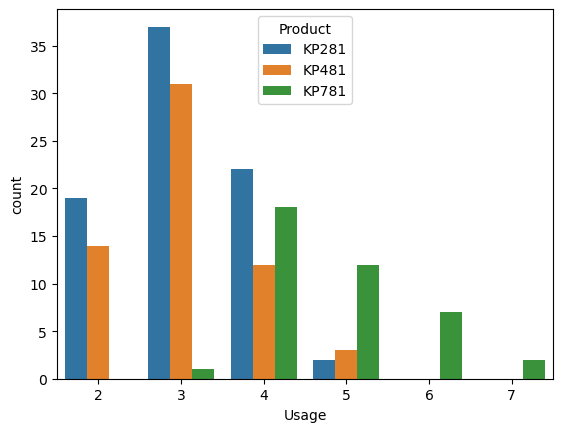

In [42]:
sb.countplot(aerofit_df['Usage'],hue=aerofit_df['Product'])
plt.show()

__From the above visual we can observe that__:<br>
1.As the usage goes more than 4 times or equal to 4 times, they prefer the KP781 product.<br>
2.Customers who use it less than or equal to 3 , bought KP281 and KP481 products.<br>
3.The customers who use the product 5 times,6 or 7 preferred KP781.<br>

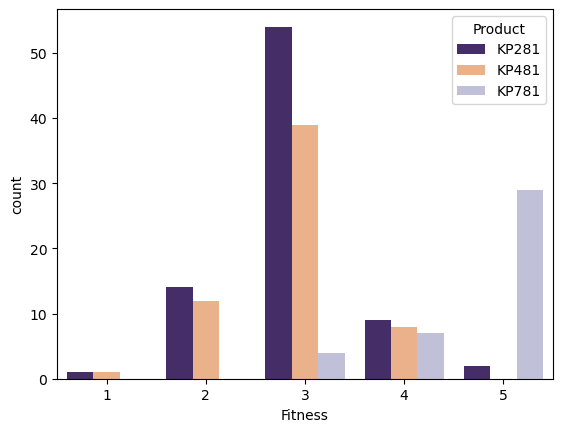

In [43]:
sb.countplot(aerofit_df['Fitness'],hue=aerofit_df['Product'],palette=['#432371',"#FAAE7B",'#bcbddc'])
plt.show()

The customers with Fitness rating 5 bought KP781.It kept gradually increasing from fitness rating 3.
In all fitness rating we can see that there are customers who bought the KP281. 

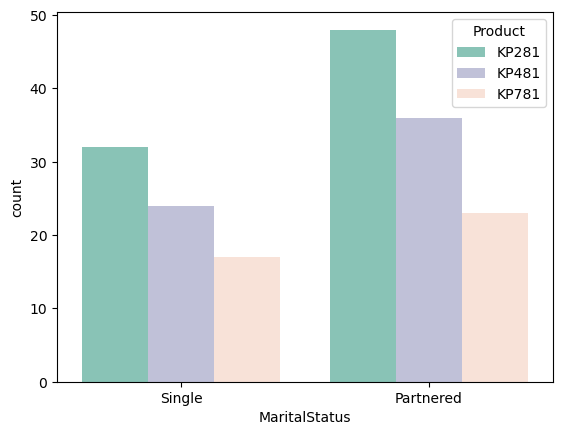

In [44]:
sb.countplot(aerofit_df['MaritalStatus'],hue=aerofit_df['Product'],palette=['#7fcdbb','#bcbddc','#fee0d2'])
plt.show()

There are more married customers who bought aerofit products.

In [45]:
#checking the correlation between age and income
aerofit_df['Age'].corr(aerofit_df['Income'])

0.5134136851208332

__Age and income are moderately and positively correlated__

In [46]:
aerofit_df['Age'].corr(aerofit_df['Usage'])

0.015064469362853598

Age and usage are less correlated.

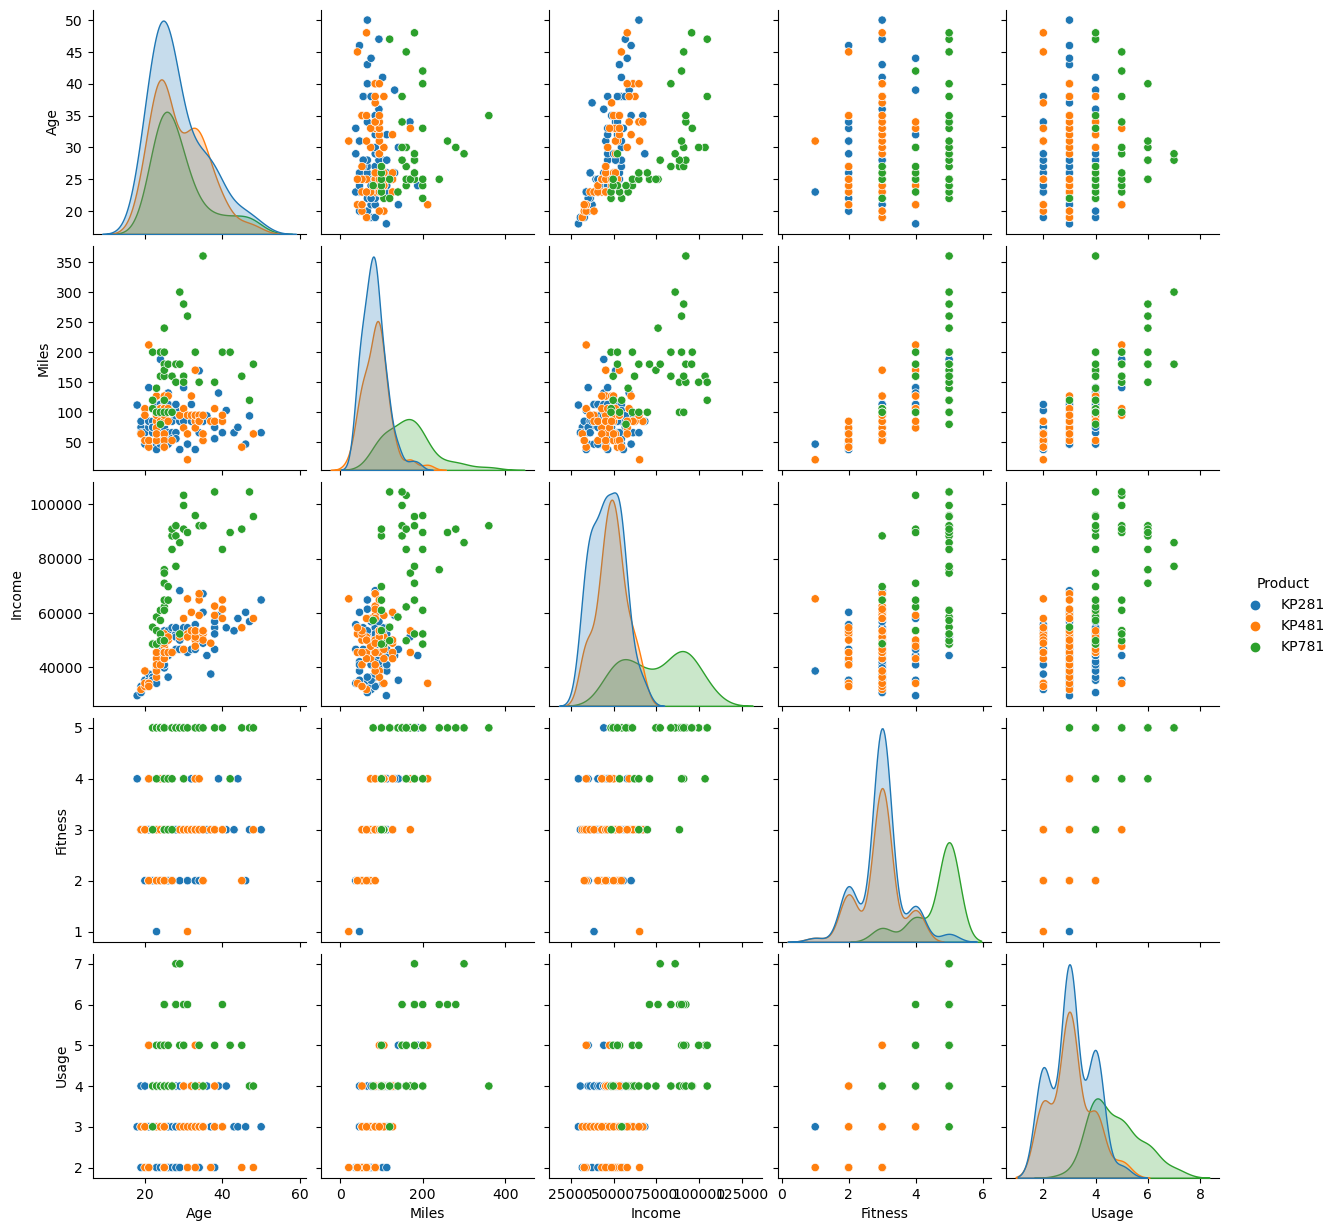

In [47]:
sb.pairplot(data=aerofit_df,vars=['Age','Miles','Income','Fitness','Usage'],hue='Product')

We can see correlation between two variables from the above plot<br>
I have took numerical values.<br>
We can see that age and income are positively correlated.

## Probability

In [48]:
gendertab=pd.crosstab(aerofit_df['Gender'],aerofit_df['Product'],margins=True,margins_name='Total',normalize=True)
gendertab

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
Total,0.444444,0.333333,0.222222,1.000000


The probability of a customer buying KP281 is higher than the other products.44% sold are KP281 products. P(KP281)<br>
57% of the customers are male.<br>
The probability of selling KP781 is 0.2222. Out of all the products sold, 22% of the products are KP781.<br>


In [49]:
df_male=aerofit_df[aerofit_df['Gender']=='Male']
gendertabmale = pd.crosstab(df_male['Gender'],df_male['Product'],margins=True,margins_name='Total',normalize=True)
gendertabmale

Product,KP281,KP481,KP781,Total
Gender,,,,
Male,0.384615,0.298077,0.317308,1.0
Total,0.384615,0.298077,0.317308,1.0


This table shows the conditional probability.That is, given that a customer is male ,the probability of KP281 ,KP481,KP781 products.We can see that, given a customer is male, the probability of KP281 is 0.3846,probability of KP481 is 0.2980 and probability of KP781 is 0.317308. P(KP281|Male)


In [50]:
df_female=aerofit_df[aerofit_df['Gender']=='Female']
gendertabfemale = pd.crosstab(df_female['Gender'],df_female['Product'],margins=True,margins_name='Total',normalize=True)
gendertabfemale

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.526316,0.381579,0.092105,1.0
Total,0.526316,0.381579,0.092105,1.0


The conditonal probability P(KP781|FEMALE) is very low.This shows that the chances for female to buy KP781 is very low.

In [51]:
maritaltab = pd.crosstab(aerofit_df['MaritalStatus'],aerofit_df['Product'],margins=True,margins_name='Total',normalize=True)
maritaltab

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
Total,0.444444,0.333333,0.222222,1.000000


The data shows that 59% of customers are partnered.
It also shows that Probability of single and KP781 P(KP781 INTERSECT Single) is very low.We can say that singles are less likely to buy  a KP781 product.

In [52]:
df_partnered = aerofit_df[aerofit_df['MaritalStatus']=='Partnered']
maritalpartab = pd.crosstab(df_partnered['MaritalStatus'],df_partnered['Product'],margins=True,margins_name='Total',normalize=True)
maritalpartab

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.448598,0.336449,0.214953,1.0
Total,0.448598,0.336449,0.214953,1.0


We can interpret this as , given a customer as partnered the chances for him to buy a KP281 product is 44.85%.

In [53]:
df_single = aerofit_df[aerofit_df['MaritalStatus']=='Single']
maritalsingletab = pd.crosstab(df_single['MaritalStatus'],df_single['Product'],margins=True,margins_name='Total',normalize=True)
maritalsingletab

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Single,0.438356,0.328767,0.232877,1.0
Total,0.438356,0.328767,0.232877,1.0


This shows the conditional probaility that a given customer is single.

In [54]:
incometab = pd.crosstab(aerofit_df['Incomecategory'],aerofit_df['Product'],margins=True,margins_name='Total',normalize=True)
incometab

Product,KP281,KP481,KP781,Total
Incomecategory,,,,
20k-40k,0.127778,0.050000,0.000000,0.177778
40k-60k,0.283333,0.244444,0.061111,0.588889
60k-80k,0.033333,0.038889,0.055556,0.127778
80k-100k,0.000000,0.000000,0.088889,0.088889
100k-120k,0.000000,0.000000,0.016667,0.016667
Total,0.444444,0.333333,0.222222,1.000000


This representation shows us the probabilities of income and product.And also the marginal probability of products.<br>
It clearly shows that the income and product intersection probability for 80k-100k is 0 for KP281 and KP481.This means that there are very low chances for the customer to buy KP281,KP481.

In [55]:
df_income80 = aerofit_df[aerofit_df['Incomecategory']=='80k-100k']
incometab1 = pd.crosstab(df_income80['Incomecategory'],df_income80['Product'],margins=True,margins_name='Total',normalize=True)
incometab1

Product,KP781,Total
Incomecategory,,
80k-100k,1.0,1.0
Total,1.0,1.0


Given that the income of a customer is 80k-100k, the probability of him buying KP781 is 1.This means that he will buy KP781.

In [56]:
kp281 = aerofit_df[aerofit_df['Product']=='KP281']
kp281.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Incomecategory
0,KP281,18,Male,14,Single,3,4,29562,112,17-23,20k-40k
1,KP281,19,Male,15,Single,2,3,31836,75,17-23,20k-40k
2,KP281,19,Female,14,Partnered,4,3,30699,66,17-23,20k-40k
3,KP281,19,Male,12,Single,3,3,32973,85,17-23,20k-40k
4,KP281,20,Male,13,Partnered,4,2,35247,47,17-23,20k-40k


In [57]:
kp281tab1 = pd.crosstab(kp281['age_group'],kp281['Product'],normalize=True)
kp281tab1

Product,KP281
age_group,
17-23,0.1750
23-28,0.3750
28-33,0.1875
33-38,0.1125
38-43,0.0875
43-48,0.0500
>=48,0.0125


Age group 23-28 have high chances to buy KP281 product.

In [58]:
kp281tab2 = pd.crosstab(kp281['Fitness'],kp281['Product'],normalize=True)
kp281tab2

Product,KP281
Fitness,
1,0.0125
2,0.1750
3,0.6750
4,0.1125
5,0.0250


We can see that customers with fitness rating 3 are more likely to buy KP281 product

In [59]:
kp281tab3 = pd.crosstab(kp281['Usage'],kp281['Product'],normalize=True)
kp281tab3

Product,KP281
Usage,
2,0.2375
3,0.4625
4,0.2750
5,0.0250


Customers who use treadmill 3 times on an average per week likely to buy KP281

In [60]:
kp481 = aerofit_df[aerofit_df['Product']=='KP481']
kp481.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Incomecategory
80,KP481,19,Male,14,Single,3,3,31836,64,17-23,20k-40k
81,KP481,20,Male,14,Single,2,3,32973,53,17-23,20k-40k
82,KP481,20,Female,14,Partnered,3,3,34110,106,17-23,20k-40k
83,KP481,20,Male,14,Single,3,3,38658,95,17-23,20k-40k
84,KP481,21,Female,14,Partnered,5,4,34110,212,17-23,20k-40k


In [61]:
kp481tab1 = pd.crosstab(kp481['age_group'],kp481['Product'],normalize=True)
kp481tab1

Product,KP481
age_group,
17-23,0.116667
23-28,0.416667
28-33,0.133333
33-38,0.216667
38-43,0.083333
43-48,0.016667
>=48,0.016667


In [62]:
kp481tab2 = pd.crosstab(kp481['Incomecategory'],kp481['Product'],normalize=True)
kp481tab2

Product,KP481
Incomecategory,
20k-40k,0.150000
40k-60k,0.733333
60k-80k,0.116667


Customers with income of 40-60k dollars per annum are more likely to buy KP481

In [63]:
kp481tab3 = pd.crosstab(kp481['Fitness'],kp481['Product'],normalize=True)
kp481tab3

Product,KP481
Fitness,
1,0.016667
2,0.200000
3,0.650000
4,0.133333


In [64]:
kp481tab3 = pd.crosstab(kp481['Usage'],kp481['Product'],normalize=True)
kp481tab3

Product,KP481
Usage,
2,0.233333
3,0.516667
4,0.200000
5,0.050000


In [65]:
kp781 = aerofit_df[aerofit_df['Product']=='KP781']
kp781.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Incomecategory
140,KP781,22,Male,14,Single,4,3,48658,106,17-23,40k-60k
141,KP781,22,Male,16,Single,3,5,54781,120,17-23,40k-60k
142,KP781,22,Male,18,Single,4,5,48556,200,17-23,40k-60k
143,KP781,23,Male,16,Single,4,5,58516,140,23-28,40k-60k
144,KP781,23,Female,18,Single,5,4,53536,100,23-28,40k-60k


In [66]:
kp781tab1 = pd.crosstab(kp781['Incomecategory'],kp781['Product'],normalize=True)
kp781tab1

Product,KP781
Incomecategory,
40k-60k,0.275
60k-80k,0.250
80k-100k,0.400
100k-120k,0.075


40% of customers who bought KP781 earn income of 80k-100k

In [67]:
kp781tab2 = pd.crosstab(kp781['Usage'],kp781['Product'],margins=True,normalize=True)
kp781tab2

Product,KP781,All
Usage,,
3,0.025,0.025
4,0.450,0.450
5,0.300,0.300
6,0.175,0.175
7,0.050,0.050
All,1.000,1.000


45% of customers who bought KP781 use treadmill 4 times a week on average

In [68]:
kp781tab3 = pd.crosstab(kp781['age_group'],kp781['Product'],normalize=True)
kp781tab3

Product,KP781
age_group,
17-23,0.075
23-28,0.475
28-33,0.225
33-38,0.075
38-43,0.075
43-48,0.050
>=48,0.025


In [69]:
kp781tab4 = pd.crosstab(kp781['Fitness'],kp781['Product'],normalize=True)
kp781tab4

Product,KP781
Fitness,
3,0.100
4,0.175
5,0.725


Customers with fitness rating 5 are more likely to buy KP781

# Recommendations:

1.From the data we can see that customers between the age group 23-28 bought treadmills more than the other age groups.So, we can recommend or promote aerofit products to the people in this age group.<br>
2.Customers whose income is >60k prefer the KP781 product.So we can recommend this product to customer with high salaries.<br>
3.We can recommend the KP281 product to the customer with less income below 40k.<br>
4.We can recommend KP281 and KP481 product to customer with income between 40k-60k as they might buy any one of the product.<br>
5.We should always keep the KP281 product stock.That is, more people prefer KP281.<br>
6.Customers with fitness rating 5 prefer the KP781 product.We can recommend KP781 to customer with this rating.<br>
7.We can try recommending the KP781 product to males with fitness above 5 and income above 60k as they are more likely to buy KP781.<br>
8.We can recommend KP281 and kp481 products to singles.
